In [1]:
import pandas as pd
import numpy as np

In [29]:
def load_train_data(data_path):
    train = pd.read_csv(data_path)
    return train

In [43]:
def prepare_train_data(data_path):
    train = load_train_data(data_path)
    target = train.actual_delivery_time
    #train.drop(['actual_delivery_time'], axis=1, inplace=True)
    return train, target

In [44]:
train, target = prepare_train_data("historical_data.csv")
train.head(n=10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [80]:
import datetime
create_time = pd.to_datetime(train['created_at'])
delivery_time = pd.to_datetime(train['actual_delivery_time'])
expected_time_arrival = delivery_time - create_time
train['ETA'] = expected_time_arrival / np.timedelta64(1, 's')

train['ordered_at_store'] = create_time + pd.to_timedelta(train['estimated_order_place_duration'], unit='s')
train['ordered_hour'] = train['ordered_at_store'].dt.hour
train['Cooking Time'] = train['ETA'] - train['estimated_order_place_duration'] - train['estimated_store_to_consumer_driving_duration']
train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,ETA,Cooking Time,ordered_at_store,ordered_hour
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2472.0,2015-02-06 22:31:43,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2888.0,2015-02-10 21:56:51,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,645.0,2015-01-22 20:46:54,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2340.0,2015-02-03 21:29:11,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1294.0,2015-02-15 02:48:02,2


[ 1.  2.  3.  4. nan  5.  6.]
7


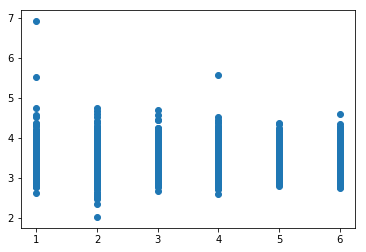

In [52]:
import matplotlib.pyplot as plt

uniq_stores = train.market_id.unique()
print(uniq_stores)
print(len(uniq_stores))
plt.scatter(train['market_id'], np.log10(train['ETA']))
plt.show()

[ 1.  2.  3.  4. nan  5.  6.  7.]


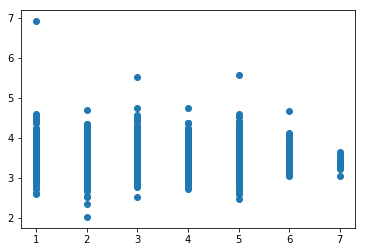

In [55]:
uniq_protocols = train.order_protocol.unique()
print(uniq_protocols)
plt.scatter(train['order_protocol'], np.log10(train['ETA']))
plt.show()

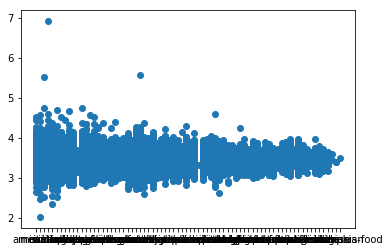

In [62]:
primary_store_df = train[train.store_primary_category.notnull()]
plt.scatter(primary_store_df['store_primary_category'], np.log10(primary_store_df['ETA']))
plt.show()

[ 4  1  6  3  2  5  7  8 10  9 13 16 12 25 17 11 24 30 14 31 35 40 26 28
 21 20 15 19 18 23 29 34 42 22 56 36 57 39 47 45 38 33 27 41 32 50 59 51
 37 48 44 49 43 84 64 66]


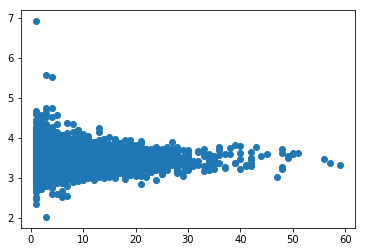

In [67]:
uniq_items = train.total_items.unique()
print(uniq_items)
train = train[train['total_items'] < 60]
plt.scatter(train['total_items'], np.log10(train['ETA']))
plt.show()

[ 33.   1.   6.   2.  10.   7.   8.   3.  16.   5.   4.  24.  12.  19.
  21.  22.  27.  13.  18. 117. 130. 121.  94.  34.  17.  38.  20.  15.
  39.  26.  30.  35.  11.  14.  32.  29.  25.  23.  61.  41.  58.  51.
  57.  60.   9. 108.  72.  89. 112.  55. 126.  80.  69. 125. 113. 105.
  98.  86.  90.  87.  74.  84.  91.  96. 123. 101. 119.  nan 129.  66.
  81.  36.  75.  43.  70.  65.  77. 114.  62. 116. 102.  76.  67.  64.
  88.  73.  63.  46.  28.  47. 110.  97.  42.  79.  49.  50.  37.  92.
 103.  44.  68.  56.   0. 107.  78.  71. 128. 104.  45.  31. 100.  40.
  53. 115. 109.  99.  85.  59. 118.  54.  52.  48. 132. 127. 133. 131.
 149.  93. 111.  95.  82. 136. 120. 134. 124. 106. 137.  83. 152. 147.
 144. 150. 145. 122. 155. 135. 151. 140. 141. 143. 138. 139. 156. 146.
  -2. 160. 158. 154. 153. 148. 142. 157. 171.  -1.  -3. 162. 165. 163.
 164. 159. 169.  -4. 168.]


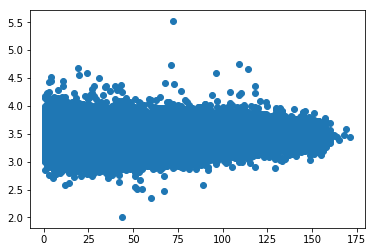

In [69]:
uniq_onshift_dashers = train.total_onshift_dashers.unique()
print(uniq_onshift_dashers)
train = train[train['total_onshift_dashers'] > 0]
plt.scatter(train['total_onshift_dashers'], np.log10(train['ETA']))
plt.show()

[22 21 20  2  3  0  1 19  4 23  5 18  6  7 17 16 15 14]


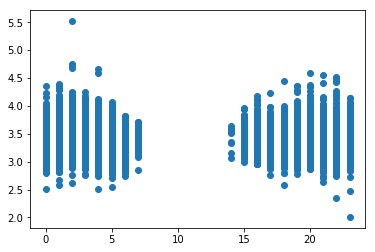

In [82]:
uniq_ordered_hour = train.ordered_hour.unique()
print(uniq_ordered_hour)
plt.scatter(train['ordered_hour'], np.log10(train['ETA']))
plt.show()

[ 21.   2.   9.   7.  18.   1.   4.   3.   8.  12.  26.  11.  30.  16.
  39.  24.  27.  20.  13. 178. 230. 205. 149.  28.  15.  42.  43.  33.
   5.  37.  46.  36.  14.  29.  32.  72.  41.  54.  49.  23.  56.  60.
  10.   6. 154. 144.  34. 100. 173.  80. 202. 124. 130. 181. 188. 148.
 150. 127. 160. 107. 123. 159. 186. 143. 190. 171. 261. 132.  67. 120.
 158.  59.  38.  47.  68.  92.  99. 175. 102. 184. 121.  17.  96. 111.
  22. 131. 141.  89.  48.  65. 194.  73.  45. 203. 134. 126. 183.  64.
 167.  31. 153. 119.  75.  95.  52. 118. 191.  61. 106.  19.  58. 152.
 101.  35. 151.  83. 179.  97.  44.  25. 147. 169. 135. 142. 165. 172.
  91.  40. 237. 198. 220. 219.  78.  90. 138. 168.  85.  81. 212. 192.
 137. 189.  51.  74.  62.  63.  50. 122.  93.  66. 207. 113. 114.  69.
  57.  86.  71.  79.  87.  88.  70.  84. 108.  76.  53.  55.  82. 110.
  98. 185. 225. 104. 145. 247. 232.  77. 133. 103. 174. 164. 193. 208.
 231. 163.  94. 146. 115. 129. 112. 136. 162. 176. 246. 199. 116. 109.
 161. 

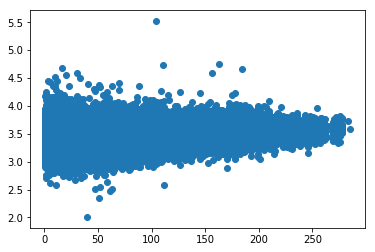

In [85]:
uniq_outstanding_orders = train.total_outstanding_orders.unique()
print(uniq_outstanding_orders)
plt.scatter(train['total_outstanding_orders'], np.log10(train['ETA']))
plt.show()

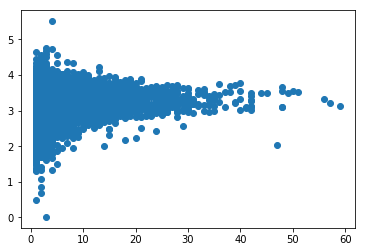

In [87]:
plt.scatter(train['total_items'], np.log10(train['Cooking Time']))
plt.show()